**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Question 1](#toc2_1_)
  - 2.2. [Question 2](#toc2_2_)
  - 2.3. [Question 3](#toc2_3_)
  - 2.4. [Question 4](#toc2_4_)
  - 2.5. [Question 5](#toc2_5_)
  - 2.6. [Question 6](#toc2_6_)
  - 2.7. [Question 7](#toc2_7_)
  - 2.8. [Question 8](#toc2_8_)
  
<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [2]:
from ExchangeEconomy import ExchangeEconomyClass

In [4]:
model = ExchangeEconomyClass()

Depiction of the utility function of A:

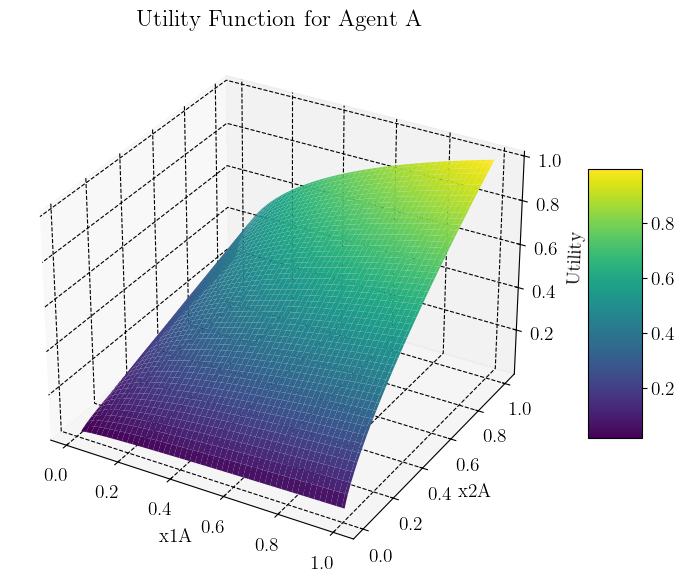

In [5]:
# Generate a grid of x1A and x2A values.
x = np.linspace(0.01, 1, 100)  # Start from a small positive number to avoid division by zero.
y = np.linspace(0.01, 1, 100)
x1A, x2A = np.meshgrid(x, y)

# Compute the utility for each combination of x1A and x2A.
utility_values = model.utility_A(x1A, x2A)

# Create a surface plot.
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x1A, x2A, utility_values, cmap='viridis')

# Add labels and show plot.
ax.set_xlabel('x1A')
ax.set_ylabel('x2A')
ax.set_zlabel('Utility')
ax.set_title('Utility Function for Agent A')
fig.colorbar(surf, shrink=0.5, aspect=5)  # Add a color bar to indicate utility values.

plt.show()

### 2.1. <a id='toc2_1_'></a>[Question 1](#toc2_1)

The code to illustrate the Edgeworth box was put completely in the class.

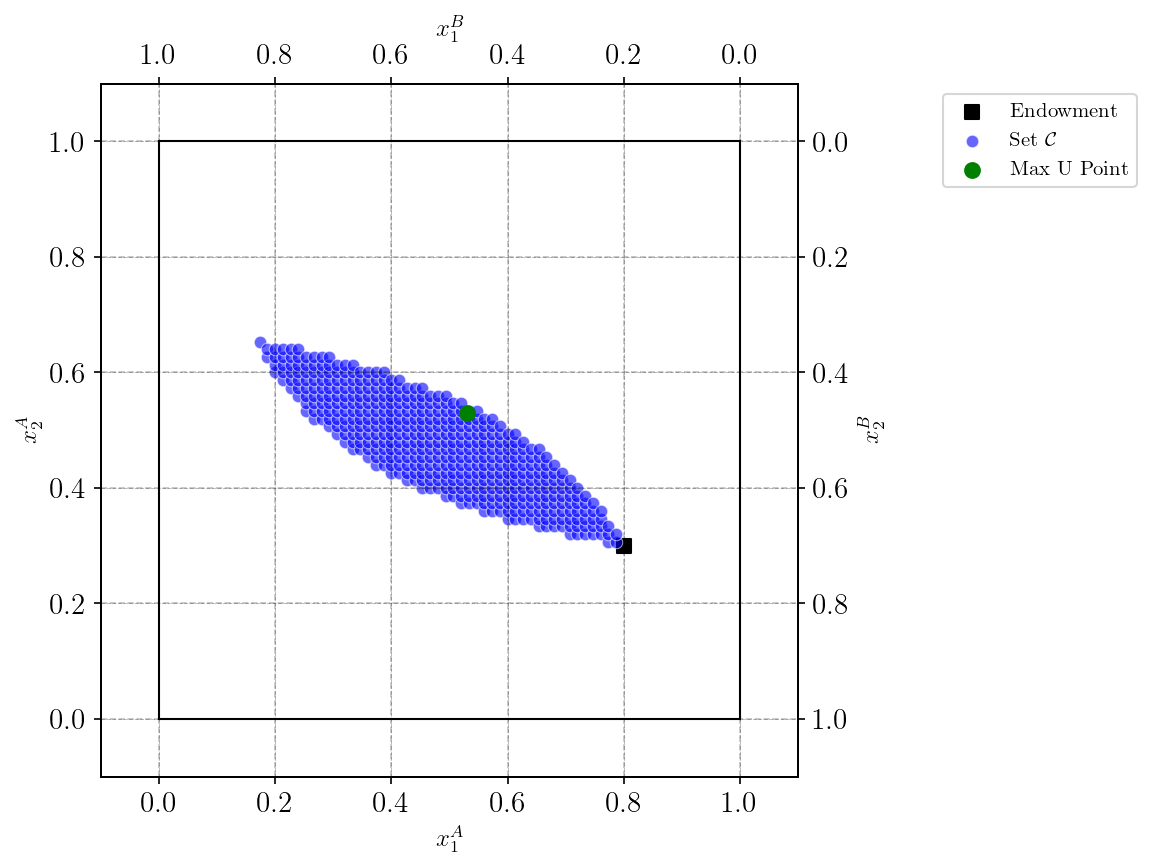

In [6]:
model.illustrate_set()

### 2.2. <a id='toc2_2_'></a>[Question 2](#toc2_2)

A simple function to calculate the errors as given in the assignment was built in the class. This function is then called and the errors are printed.

In [7]:
errors = model.compute_errors_over_prices()

for error in errors:
    print(f"p1: {error[0]:.2f}, epsilon1: {error[1]:.4f}, epsilon2: {error[2]:.4f}")

p1: 0.50, epsilon1: 0.5333, epsilon2: -0.2667
p1: 0.53, epsilon1: 0.4759, epsilon2: -0.2507
p1: 0.55, epsilon1: 0.4241, epsilon2: -0.2347
p1: 0.58, epsilon1: 0.3770, epsilon2: -0.2187
p1: 0.61, epsilon1: 0.3341, epsilon2: -0.2027
p1: 0.63, epsilon1: 0.2947, epsilon2: -0.1867
p1: 0.66, epsilon1: 0.2586, epsilon2: -0.1707
p1: 0.69, epsilon1: 0.2252, epsilon2: -0.1547
p1: 0.71, epsilon1: 0.1944, epsilon2: -0.1387
p1: 0.74, epsilon1: 0.1658, epsilon2: -0.1227
p1: 0.77, epsilon1: 0.1391, epsilon2: -0.1067
p1: 0.79, epsilon1: 0.1143, epsilon2: -0.0907
p1: 0.82, epsilon1: 0.0911, epsilon2: -0.0747
p1: 0.85, epsilon1: 0.0693, epsilon2: -0.0587
p1: 0.87, epsilon1: 0.0489, epsilon2: -0.0427
p1: 0.90, epsilon1: 0.0296, epsilon2: -0.0267
p1: 0.93, epsilon1: 0.0115, epsilon2: -0.0107
p1: 0.95, epsilon1: -0.0056, epsilon2: 0.0053
p1: 0.98, epsilon1: -0.0218, epsilon2: 0.0213
p1: 1.01, epsilon1: -0.0371, epsilon2: 0.0373
p1: 1.03, epsilon1: -0.0516, epsilon2: 0.0533
p1: 1.06, epsilon1: -0.0654, epsil

### 2.3. <a id='toc2_3_'></a>[Question 3](#toc2_3)

To find the market clearing price, the errors are minimized using the following code:

In [8]:
# Separate the data into lists
p1_values = [error[0] for error in errors]
eps1_values = [error[1] for error in errors]
eps2_values = [error[2] for error in errors]

# Find the value of p1 that minimizes the sum of squared errors
p1_range = np.linspace(0.5, 2.5, 200)
min_sse = np.inf
optimal_p1 = None

def sum_squared_errors(p1, p1_values, eps1_values, eps2_values):
    
    idx = np.argmin(np.abs(np.array(p1_values) - p1))
    
    eps1 = eps1_values[idx]
    eps2 = eps2_values[idx]
    
    sse = eps1**2 + eps2**2
    
    return sse

for p1 in p1_range:
    sse = sum_squared_errors(p1, p1_values, eps1_values, eps2_values)
    if sse < min_sse:
        min_sse = sse
        optimal_p1 = p1

point_1 = (model.demand_A(optimal_p1)[0],model.demand_A(optimal_p1)[1])

print(point_1)
print(f"The optimal value of p1 (assuming p2=1) where abs(eps1) and abs(eps2) are minimized is: {optimal_p1:.4f}")
print(model.demand_A(optimal_p1)[0],model.demand_A(optimal_p1)[1])
print(model.demand_B(optimal_p1)[0],model.demand_B(optimal_p1)[1])
print(model.utility_A(model.demand_A(optimal_p1)[0],model.demand_A(optimal_p1)[1]))
print(model.utility_A(model.demand_B(optimal_p1)[0],model.demand_B(optimal_p1)[1]))

(0.37279999999999996, 0.7025125628140704)
The optimal value of p1 (assuming p2=1) where abs(eps1) and abs(eps2) are minimized is: 0.9422
0.37279999999999996 0.7025125628140704
0.6286222222222221 0.2961474036850921
0.5687586716325453
0.3805997770530927


This was not asked in the exercise but below is a graphical illustration of the results from questions 2 and 3.

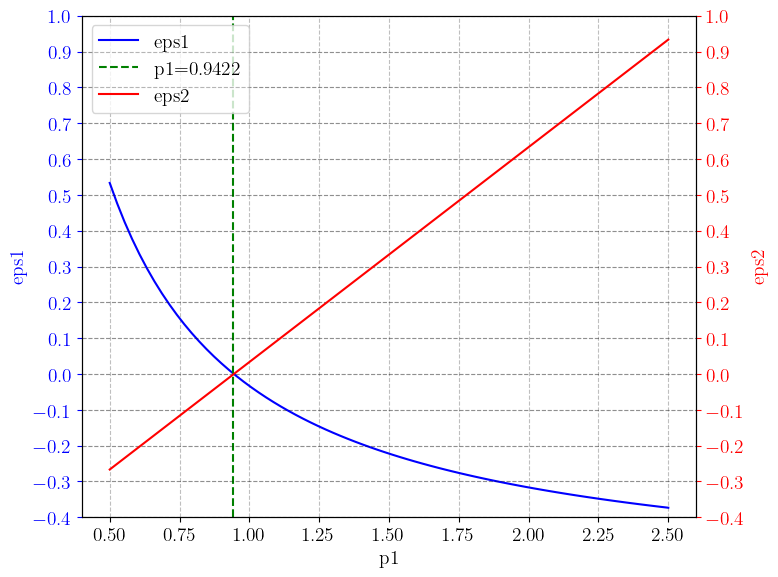

In [9]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot eps1
ax1.plot(p1_values, eps1_values, 'b-', label='eps1')
ax1.set_xlabel('p1')
ax1.set_ylabel('eps1', color='b')
ax1.tick_params(axis='y', colors='b')

# Create a twin axis for eps2
ax2 = ax1.twinx()
ax2.plot(p1_values, eps2_values, 'r-', label='eps2')
ax2.set_ylabel('eps2', color='r')
ax2.tick_params(axis='y', colors='r')

# Now, instead of calculating upper_limit and lower_limit from the data, set them directly:
lower_limit = -0.4
upper_limit = 1.0
step_size = 0.1

# As both axes will share the exact range and step size, we can directly set these:
ax1.set_ylim([lower_limit, upper_limit])
ax2.set_ylim([lower_limit, upper_limit])

# Generate ticks from lower_limit to upper_limit with step_size
ticks = np.arange(lower_limit, upper_limit + step_size, step_size)

# Set ticks for both axes
ax1.set_yticks(ticks)
ax2.set_yticks(ticks)

# Adjust the spacing between subplots
fig.tight_layout()

# Add a straight vertical line at p1 = 0.9422
ax1.axvline(x=0.9422, color='g', linestyle='--', label='p1=0.9422')

# Adjust legends to include the new line
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Display the plot
plt.show()

### 2.4. <a id='toc2_4_'></a>[Question 4](#toc2_4)

Firstly, to get a better intuition, I plotted the function.

$$
f(p_1) = \left(1 - \frac{2}{3} \cdot \frac{p_1 \cdot 0.8 + 1 \cdot 0.3}{p_1}\right)^{0.5} \left(1 - \frac{1}{3} \cdot \frac{p_1 \cdot 0.8 + 1 \cdot 0.3}{p_1}\right)^{0.5}
$$_

/Users/ben/IntroProg-lectures/projects/ExchangeEconomy.py:27: RuntimeWarning: invalid value encountered in scalar power
  return x1A**self.par.alpha * x2A**(1-self.par.alpha)


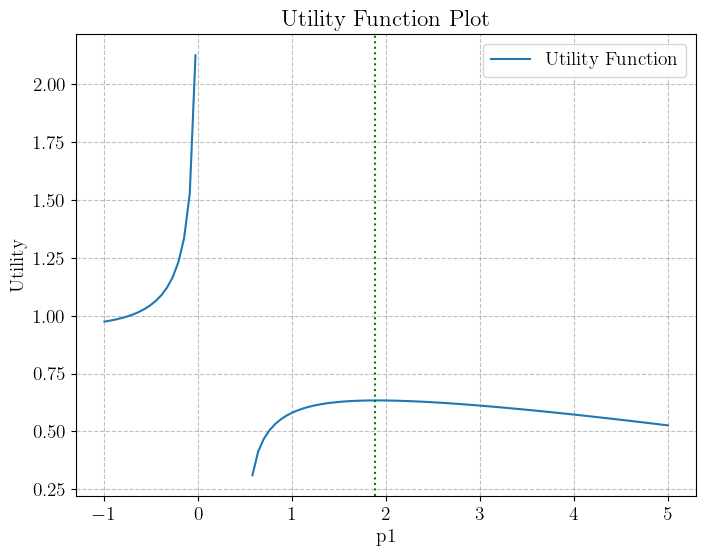

In [10]:
# Define the range of x values
p_range = np.linspace(-1, 5, 100)  # Range of x values from 0 to 5

def func(p1):
    y = model.utility_A((1-model.demand_B(p1)[0]), (1-model.demand_B(p1)[1]))
    return y

utility_values = [func(p1) for p1 in p_range]

# Plot the utility function
plt.figure(figsize=(8, 6))
plt.plot(p_range, utility_values, label='Utility Function')
plt.xlabel('p1')
plt.ylabel('Utility')
plt.title('Utility Function Plot')
plt.legend()
plt.grid(True)
plt.axvline(x=1.88, color='green', linestyle='dotted')
plt.show()

a) To answer this first part of question 4, a simple array of price-utility pairs if created, of which I then identify the one with the highest utility.

In [18]:
def objective_function(p1):
    a = np.array(model.demand_B(p1))
    b = np.array([1, 1])
    c = np.subtract(b, a)
    d = model.utility_A(c[0], c[1])
    return -d

pairs = []

for p1 in p1_values:
    obj_value = objective_function(p1)
    if not np.isnan(obj_value):
        pairs.append((p1, obj_value))

max_pair = min(pairs, key=lambda x: x[1])

print("Pair with the highest value:")
print("Price: "+str(max_pair[0]))
print("Utility: "+str(-max_pair[1]))

point_2 = (1 - model.demand_B(max_pair[0])[0], 1 - model.demand_B(max_pair[0])[1])


Pair with the highest value:
Price: 1.8866666666666667
Utility: 0.633615985237553


/Users/ben/IntroProg-lectures/projects/ExchangeEconomy.py:27: RuntimeWarning: invalid value encountered in scalar power
  return x1A**self.par.alpha * x2A**(1-self.par.alpha)


b) To answer the second part of the question, I then used the scipy minimize function.

In [19]:
# Initial guess for the optimization variable
initial_guess = 0.6
bounds = [(0, None)]

def objective_function(p1):
    y = model.utility_A((1-model.demand_B(p1)[0]), (1-model.demand_B(p1)[1]))
    return -y

result = minimize(objective_function, initial_guess, bounds=bounds)

print("Pair with the highest value:")
print("Price: "+str(result.x))
print("x1A, x2A:"+ str(point_2))
print("Utility: "+str(-result.fun))


Pair with the highest value:
Price: [1.89934057]
x1A, x2A:(0.619316843345112, 0.6408888888888888)
Utility: 0.6336208506926814


Same result as in a)

### 2.5. <a id='toc2_5_'></a>[Question 5](#toc2_5)

a) In a first step, to stay within the pair of the 77 values for $x_1^A$ and $x_2^A$, a simple search for the best combination given the other constraints is executed:

In [13]:
values = np.linspace(0, 1, 77)

from itertools import product
combinations = list(product(values, repeat=2))

def objective_function(x):
    x1A, x2A = x
    return -model.utility_A(x1A, x2A)

def constraint1(x):
    x1A, x2A = x
    return model.utility_A(x1A, x2A) - model.utility_A(model.par.w1A, model.par.w2A)

def constraint2(x):
    x1A, x2A = x
    return model.utility_B((1-x1A), (1-x2A)) - model.utility_B(model.par.w1B, model.par.w2B)

best_solution = None
best_objective_value = float('inf')

for combo in combinations:
    if constraint1(combo) >= 0 and constraint2(combo) >= 0:
        obj_value = objective_function(combo)
        if obj_value < best_objective_value:
            best_solution = combo
            best_objective_value = obj_value

print("Best solution:", best_solution)
print("Highest achievable utility:", -best_objective_value)

Best solution: (0.5263157894736842, 0.5394736842105263)
Highest achievable utility: 0.535051569873057


b) In the following, I use the minimize function from SciPy with only the constraint remaining in 5b) The final result is quite close to the one from 5a)

In [14]:
x_0 = (model.par.w1A, model.par.w2A)

b=(0, 1.0)
bnds = (b,b)

constraints = [{"type": "ineq", "fun": constraint2}]

result = minimize(objective_function,x_0, method="SLSQP", bounds=bnds, constraints=constraints)
point_3 = (result.x[0], result.x[1])
print("Best solution:", result.x)
print("Highest achievable utility:", -result.fun)

Best solution: [0.53895713 0.53895638]
Highest achievable utility: 0.538956632437626


### 2.6. <a id='toc2_6_'></a>[Question 6](#toc2_6)

a) Below, a new objective function is set which contains the utilitarian utility funciton. It is then optimized. Since any allocation which is pareto efficient can be chosen from a utilitarian social planner standpoint, there are many possible solutions. The optimisations chooses a corner solution.

In [15]:
def objective_function_2(x):
    x1A, x2A = x
    return -(model.utility_A(x1A, x2A) + model.utility_B ((1-x1A), (1-x1A)))

x_0 = (0, 0)

b=(0, 1.0)
bnds = (b,b)

constraints = [{"type": "ineq", "fun": constraint2}]

result = minimize(objective_function_2,x_0, method="SLSQP", bounds=bnds, constraints=constraints)
print("Best solution:", result.x)
print("Highest achievable utility:", -result.fun)

Best solution: [0. 0.]
Highest achievable utility: 1.0


b) To compare this with the other outcomes from questions 3) to 5) where different approaches to finding an ideal solution were chosen, an edgeworth box with the different results is printed:

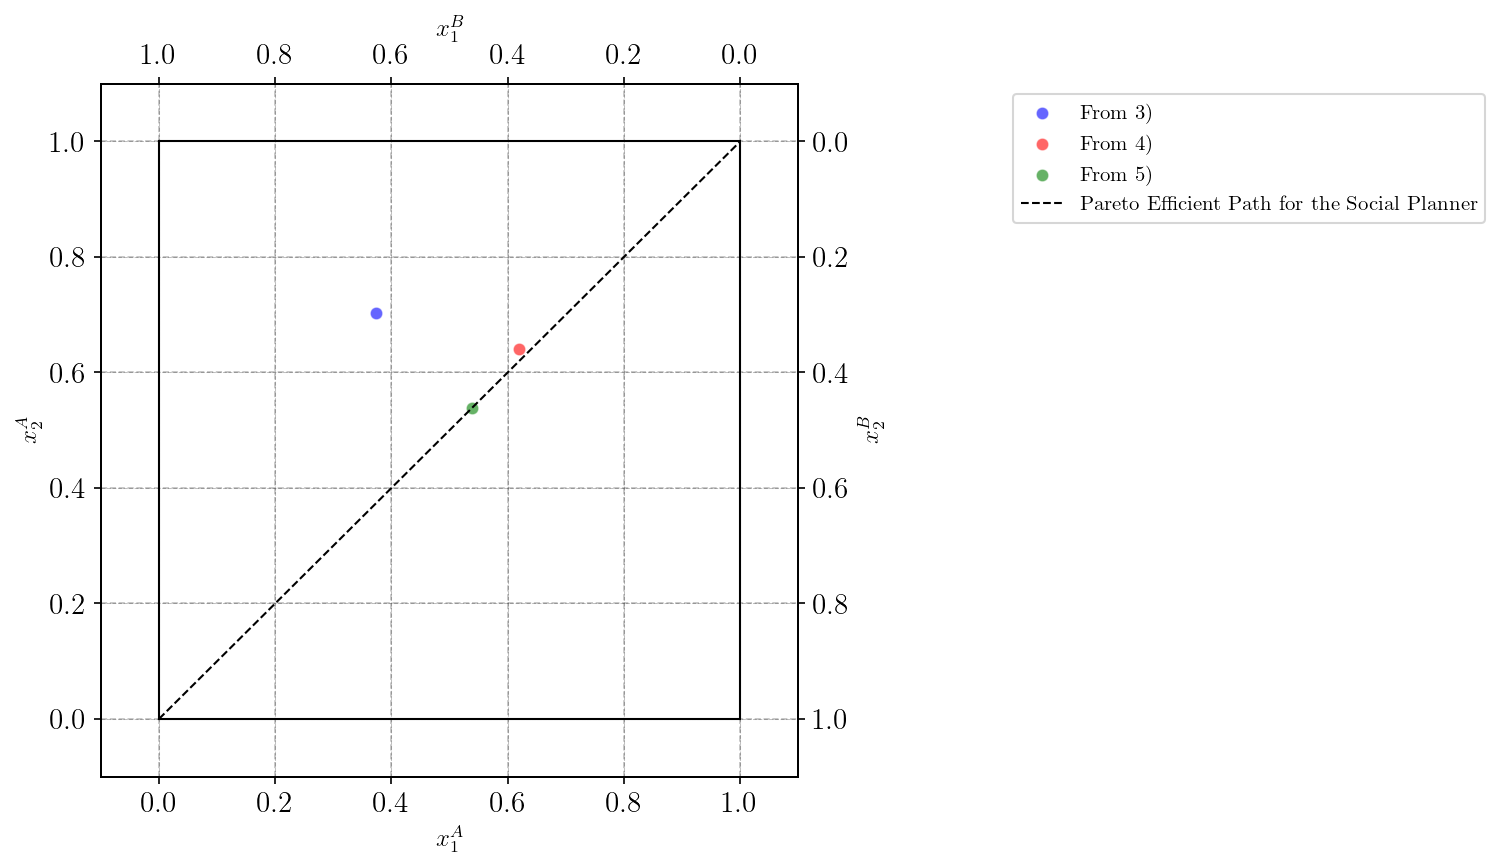

In [20]:
model.illustrate_set_2(point_1, point_2, point_3)

The result from 6) is (0, 0) but it could be any of the solutions on the dashed line. We can see that the approaches in 3) and 4) didn't lead to pareto efficient outcomes. But that is because we didn't optimize utility itself.

### 2.7. <a id='toc2_7_'></a>[Question 7](#toc2_7)

In [21]:
np.random.seed(42)

omega_1_A_arr = np.empty(50)
omega_2_A_arr = np.empty(50)

for i in range(50):
    omega_1_A_arr[i] = np.random.uniform(0, 1)
    omega_2_A_arr[i] = np.random.uniform(0, 1)


### 2.8. <a id='toc2_8_'></a>[Question 8](#toc2_8)

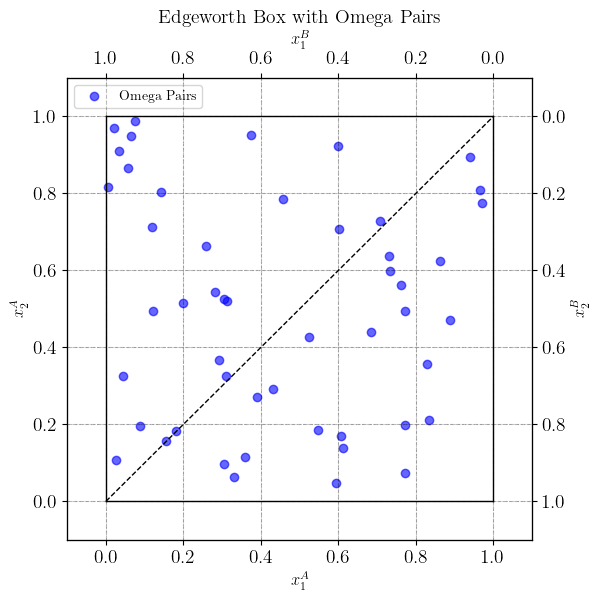

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(omega_1_A_arr, omega_2_A_arr, marker='o', color='blue', alpha=0.6, label='Omega Pairs')

ax.set_xlabel(r'$x_1^A$', fontsize=12)
ax.set_ylabel(r'$x_2^A$', fontsize=12)
ax.set_title('Edgeworth Box with Omega Pairs', fontsize=14)

ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-0.1, 1.1])

ax_B = ax.twinx()
ax_B.set_ylabel(r'$x_2^B$', fontsize=12)
ax_B.invert_yaxis()

ax_B_twin = ax_B.twiny()
ax_B_twin.set_xlabel(r'$x_1^B$', fontsize=12)
ax_B_twin.invert_xaxis()
ax_B_twin.set_xlim([1.1, -0.1])
ax_B_twin.set_ylim([1.1, -0.1])

ax_B.plot([0, 1], [1, 0], 'k--', lw=1, label='Pareto Efficieny Path')

ax.plot([0, 1], [0, 0], 'k-', lw=1)
ax.plot([0, 1], [1, 1], 'k-', lw=1)
ax.plot([0, 0], [0, 1], 'k-', lw=1)
ax.plot([1, 1], [0, 1], 'k-', lw=1)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

ax.legend(loc='upper left', fontsize=10)

plt.show()

The economic intution is clear about the fact that the optimal outcome is to move to the pareto efficeny line. To calculate this, another optimize function can be used. However, I am in lack of time to implement it.